### EDA for [e-commerce dataset](https://www.kaggle.com/carrie1/ecommerce-data)

### Content

1. [Dataset descriptive statistics](#Dataset-descriptive-statistics)
2. [Exploring columns content](#Exploring-columns-content)
   * [InvoiceNo](#InvoiceNo)   <br>
   * [StockCode](#StockCode) <br>
   * [Description](#Description)  <br>
   * [Quantity](#Quantity) 	<br>
   * [InvoiceDate](#InvoiceDate)  <br>
   * [UnitPrice](#UnitPrice)  <br>
   * [CustomerID](#CustomerID)  <br>
   * [Country](#Country) <br>

### Dataset descriptive statistics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data.csv')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [86]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of duplicates: {df.duplicated().sum()}')
print(f'Number of NaN values: \n')
nans = pd.DataFrame(df.isna().sum(), columns=['NaN count']).T
nans

Number of rows: 541909
Number of duplicates: 5268
Number of NaN values: 



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
NaN count,0,0,1454,0,0,0,135080,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Exploring columns content

#### InvoiceNo

Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a return transaction.

In [18]:
print(f'Number of unique transactions: {df.InvoiceNo.nunique()}')

purchase_filter = df.InvoiceNo.apply(lambda x: not x.startswith('C'))
return_filter = df.InvoiceNo.apply(lambda x: x.startswith('C'))
print(f'Number of purchase transactions: {df[purchase_filter].InvoiceNo.nunique()}')
print(f'Number of return transactions: {df[return_filter].InvoiceNo.nunique()}')

Number of unique transactions: 25900
Number of purchase transactions: 22064
Number of return transactions: 3836


#### StockCode

Product (item) code. Nominal, a 5-digit integral number (also there are 5 digits+letter indexes, and `gift_0001_20` like indexes) uniquely assigned to each distinct product.

In [21]:
print(f'Number of unique items: {df.StockCode.nunique()}')

Number of unique items: 4070


#### Description
Product (item) name. Nominal.

In [83]:
print(f'Number of unique descriptions: {df.Description.nunique()}')
print(f'Number of items without description: {df.StockCode.nunique() - df.dropna(subset=["Description"]).StockCode.nunique()}')

Number of unique descriptions: 4223
Number of items without description: 112


There are StockCode's with multiple descriptions

In [74]:
description_dup = df.copy()
description_dup = description_dup.fillna(0)
description_dup = description_dup.groupby(by=['StockCode', 'Description']).count().reset_index()
description_dup = description_dup.groupby(by=['StockCode']).agg({'Description':'count'}).reset_index()
description_dup.columns = ['StockCode', 'DescriptionCount']
description_dup = description_dup.sort_values('DescriptionCount', ascending=False)
description_dup

,StockCode,DescriptionCount
173,20713,9
1982,23084,8
3593,85175,7
871,21830,7
429,21181,6
...,...,...
1646,22736,1
1647,22737,1
1648,22738,1
1649,22739,1


Print descriptions for Stock 20713

In [78]:
df[df['StockCode'] == '20713'].groupby(by=['StockCode', 'Description']).agg({'InvoiceNo':'count'})

InvoiceNo
StockCode Description                            
20713     Found                                 1
          JUMBO BAG OWLS                      673
          Marked as 23343                       1
          found                                 1
          wrongly coded 23343                   1
          wrongly coded-23343                   1
          wrongly marked 23343                  1
          wrongly marked. 23343 in box          1

#### Quantity
The quantities of each product (item) per transaction. Numeric.

There are outliers with quantity = [-80995, -74215, ..., 74215, 80995]

<AxesSubplot:title={'center':'Count of single item in invoice'}>

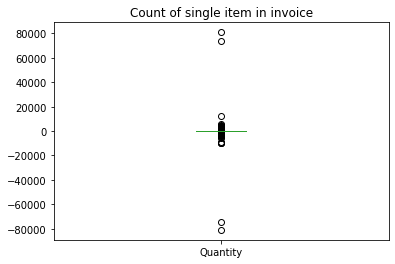

In [90]:
plt.title('Count of single item in invoice')
df.Quantity.plot(kind='box')

<AxesSubplot:title={'center':'Count of all invoice items'}>

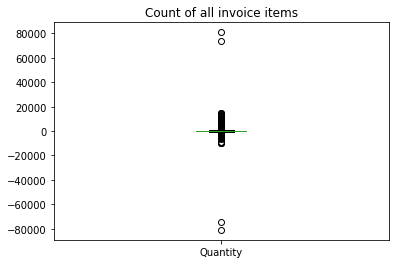

In [95]:
invoice_quantity = df.groupby(by=['InvoiceNo']).agg({'Quantity':'sum'}).reset_index()

plt.title('Count of all invoice items')
invoice_quantity.Quantity.plot(kind='box')

In [101]:
print(f'Number of invoices with quantity = 0: {invoice_quantity[invoice_quantity["Quantity"] == 0].shape[0]}')

Number of invoices with quantity = 0: 0


If negative quntities corresponds return transaction there are mismatch, because in InvoiceNo column only 3836 returns.

In [159]:
print(f'Number of rows with negative quntities: {df[df["Quantity"] < 0].shape[0]}')

Number of rows with negative quntities: 10624


#### InvoiceDate
Invoice Date and time. Numeric, the day and time when each transaction was generated.

In [106]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(f'First transaction: {df.InvoiceDate.min()}, last transaction {df.InvoiceDate.max()}')

First transaction: 2010-12-01 08:26:00, last transaction 2011-12-09 12:50:00


In [122]:
df['Year'] = df.InvoiceDate.apply(lambda x: x.year)
df['Month'] = df.InvoiceDate.apply(lambda x: x.month)
df['Day'] = df.InvoiceDate.apply(lambda x: x.day)

print(f'Transactions per year and month:')
sales = df.groupby(by=['Year', 'Month']).agg({'InvoiceNo':'count'}).reset_index()
sales.columns = ['Year', 'Month', 'InvoiceCount']
sales

Transactions per year and month:


,Year,Month,InvoiceCount
0,2010,12,42481
1,2011,1,35147
2,2011,2,27707
3,2011,3,36748
4,2011,4,29916
5,2011,5,37030
6,2011,6,36874
7,2011,7,39518
8,2011,8,35284
9,2011,9,50226


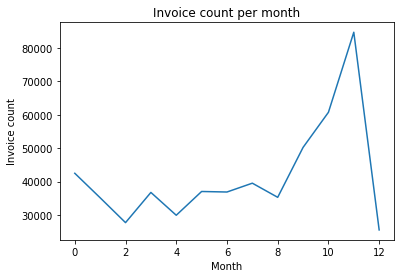

In [128]:
plt.title('Invoice count per month')
sales.InvoiceCount.plot()
plt.xlabel('Month')
plt.ylabel('Invoice count')
plt.show()

#### UnitPrice

Unit price. Numeric, Product price per unit in sterling.

There are outlier with price aprox 38k and -10k.

Number of rows with unit price = 0: 2515
Number of items with unit price = 0: 1419


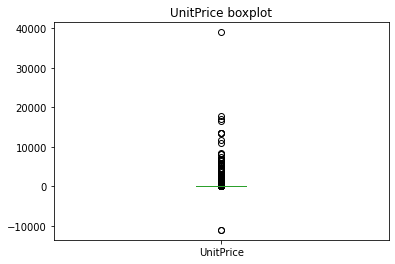

In [144]:
print(f'Number of rows with unit price = 0: {df[df["UnitPrice"] == 0].shape[0]}')
print(f'Number of items with unit price = 0: {df[df["UnitPrice"] == 0].StockCode.nunique()}')

plt.title('UnitPrice boxplot')
df.UnitPrice.plot(kind='box')
plt.show()

#### CustomerID

Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.



In [145]:
print(f'Unique customers: {df.CustomerID.nunique()}')

Unique customers: 4372


#### Country

Country name. Nominal, the name of the country where each customer resides.

Has `Unspecified` category.

In [146]:
print(f'Unique countries: {df.Country.nunique()}')

Unique countries: 38


In [153]:
invoices_per_country = df.groupby(by=['Country', 'InvoiceNo']).agg({'StockCode':'count'}).reset_index()
invoices_per_country = invoices_per_country.groupby(by=['Country']).agg({'InvoiceNo':'count'})
invoices_per_country = invoices_per_country.sort_values('InvoiceNo', ascending=False)
invoices_per_country

,InvoiceNo
Country,
United Kingdom,23494
Germany,603
France,461
EIRE,360
Belgium,119
Spain,105
Netherlands,101
Switzerland,74
Portugal,71
